# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Мы имеем данные за 2016 год.

**Цель** -  выявить определяющие успешность игры закономерности

**Задачи**
- Обзор и предобработка данных
- Определение важных данных исходя из периода (сколько игр выпускалось в разные годы)
- Определение количества продаж в зависимости от платформы и анализ платформ с наибольшими суммарными продажами, ответ на вопрос:  **За какой характерный срок появляются новые и исчезают старые платформы?**
- Выбор актуального периода данных, которые помогут построить прогноз на 2017 год
- Ответ на вопрос **Какие платформы лидируют по продажам, растут или падают?**
- Оценка боксплотов по глобальным продажам игр в разбивке по платформам
- Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков с помощью диаграммы рассеяния и  корреляции между отзывами и продажами. Сравнение с продажами на других платформах.
- Ответы на вопросы **Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**
- Определите для пользователя каждого региона (NA, EU, JP):
-- Самых популярных платформ (топ-5) с различиями в долях продаж.
-- Самых популярных жанров (топ-5) с разницей по регионам.
-- Влияние рейтинга ESRB на продажи в отдельном регионе
- Проверка гипотезы **•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Обзор данных

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3714,Bust A Groove,PS,1998.0,Misc,0.09,0.06,0.35,0.04,NaN,NaN,NaN
14507,Gloria Union,PSP,2011.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
9219,Space Venus starring Morning Musume,PS2,2001.0,Misc,0.00,0.00,0.14,0.00,NaN,NaN,NaN
3570,Cabela's Big Game Hunter 2005 Adventures,PS2,2004.0,Sports,0.28,0.21,0.00,0.07,55.0,8.4,T
5461,Deus Ex: Invisible War,XB,2003.0,Shooter,0.25,0.07,0.00,0.01,84.0,7.6,M


В датасете **df** 16715 значений и 11 стобцов:
1. **Name** - название игры, тип object
2. **Platform** - платформа, тип object
3. **Year_of_Release** - год выпуска игры, тип float64
4. **Genre** - жанр игры, тип object
5. **NA_sales** - продажи в Северной Америке (миллионы проданных копий), тип float64
6. **EU_sales** — продажи в Европе (миллионы проданных копий), тип float64
7. **JP_sales** — продажи в Японии (миллионы проданных копий), тип float64
8. **Other_sales** — продажи в других странах (миллионы проданных копий), тип float64
9. **Critic_Score** — оценка критиков (максимум 100), тип float64
10. **User_Score** — оценка пользователей (максимум 10), тип float64
11. **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. тип object

**Рейтинги ESRB**
- EC — Early Childhood
- E — Everyone
- E10+ — Everyone 10+
- T — Teen
- M — Mature
- AO — Adults Only
- RP — Rating Pending
- «K-A» («Kids to Adults»)— Для детей и взрослых

## Предобработка данных

### Замена названий столбцов

В нашем датасете все столбцы не преобразованы к формату snake_case, преобразуем их, сделаем все буквы в нижнем регистре.

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

Для данного датасета было решено изменить слеудующие типы данных:
1. Столбец **year_of_release** преобразовать к типу int, так как года это целые числа
2. Столбец **critic_score** преобразовать к типу int, так как это числа от 1 до 100
3. Столбец **user_score** - убрать 'tbd' и преобразовать к формату float

In [6]:
columns_int = ['year_of_release', 'critic_score']
for name in columns_int:
    df[name] = df[name].astype('Int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

Столбцы **name, genre** имеют два пропуска, также в данных двух строках отсутствует важная информация для дальнейшего анализа, такая как **critic_score, user_score, rating**, поэтому две данные строки было решено удалить.

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [9]:
df = df.dropna(subset=['name'])

Посмотрим на корреляцию наших числовых столбцов. 

In [10]:
df.select_dtypes(include=['float64', 'Int64']).corr().style.background_gradient(cmap='coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411
na_sales,-0.092326,1.000000,0.765341,0.449668,0.638695,0.240755
eu_sales,0.004045,0.765341,1.000000,0.435079,0.722796,0.220752
jp_sales,-0.168477,0.449668,0.435079,1.000000,0.291090,0.152593
other_sales,0.037821,0.638695,0.722796,0.291090,1.000000,0.198554
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


In [11]:
df['year_of_release'].isna().sum()

269

Мы видим, что **year_of_release** не коррелирует с другими столбцами, и имеет всего 269 пропущенных значений. Учитывая маленькое количество было принято решение удалить данные строки. 

In [12]:
df = df.dropna(subset=['year_of_release'])

Для колонки с оценкой критиков **critic_score**, было принято решение не обрабатывать значения Nan, так как они не коррелируют с другими столбцами, и их большое количество. Данный столбец не нужен для выполнения некоторых задач, в которых очень важна информация о жанре и количестве продаж, поэтому не имеет смысла удалять данные столбцы. 
Пропущенные значения

В столбце с оценками игроков **user_score** помимо пропусков существуют также значения **tbd** - to be determined - 2376 штук. Это означает что рейтинг еще не присвоен игроком. Было принято решение заменить эти значения на значения Nan, так как значения tbd строковые и будут мешать нам обрабатывать числовой столбец, а по смыслу они означают неопределенный рейтинг. 

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [14]:
(df['user_score'] == 'tbd').sum()

0

Теперь значения tbd отсутствуют и мы можем преобразовать к формату float

In [15]:
df['user_score'] = df['user_score'].astype('float')

Данные по оценкам нам нужны для выполнения анализа влияния оценок на продажи, для этого пункта создадим таблицу без пропусков по оценкам.

In [16]:
df_rating = df[(~df['user_score'].isna()) & (~df['critic_score'].isna()) & (~df['critic_score'].isna())]

Для колонки **rating** значения пропусков будем обозначать как отдельную группу **undeff**.

In [17]:
df['rating'] = df['rating'].fillna('undeff')

В целом мне не до конца понятно, откуда берутся игры с отсутствием оценки от критиков и пользователей, так как почти у всех выпущенных игр существую данные оценки. Поэтому я предполагаю, что это какая-то системная ошибка в данной базе данных. 
В принципе у игры может не существовать рейтинга ESRB, если она не прошла сертификацию, однако такие игры зачастую не покупают розниичные магазины и они продаются в достаточно мутных местах. Очень интересно с чем связаны отсутствия оценок и рейтинга. 

### Обработка дубликатов и форматирование строковых столбцов

In [18]:
df.duplicated().sum()

0

Мы видим что в датафрейме нет явных дубликатов, посмотрим отдельно наши столбцы с названиями игр на поиск неявных дубликатов.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [20]:
df[df['name'].str.islower()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
649,pro evolution soccer 2011,PS3,2010,Sports,0.29,1.17,0.54,0.41,77,6.8,E
2583,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,74,5.8,E
3304,pro evolution soccer 2011,X360,2010,Sports,0.09,0.44,0.00,0.07,79,5.9,E
4664,pro evolution soccer 2011,PS2,2010,Sports,0.04,0.21,0.05,0.11,<NA>,6.7,E
7149,pro evolution soccer 2011,Wii,2010,Sports,0.07,0.10,0.03,0.02,78,5.4,E
9897,nail'd,PS3,2010,Racing,0.08,0.02,0.00,0.02,66,6.2,E10+
10650,nail'd,X360,2010,Racing,0.08,0.02,0.00,0.01,64,7.1,E10+
11011,echochrome,PSP,2008,Puzzle,0.00,0.01,0.08,0.00,79,7.7,E
11273,1 vs. 100,DS,2008,Misc,0.08,0.00,0.00,0.01,38,3.2,E
12648,pro evolution soccer 2011,PC,2010,Sports,0.00,0.05,0.00,0.01,79,NaN,undeff


Поскольку в колонке **name** существуют названия как с большой так и с маленькой буквы, приведем все названия к маленькому регистру. 

In [21]:
df['name'] = df['name'].str.lower()

В столбце с названиями консолей и жанром не существует строк, начинающихся с малого регистра, так что не будем приводить данные значения к маленькому регистру. 

In [22]:
df[df['platform'].str.islower()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
df[df['genre'].str.islower()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [24]:
df['rating'].unique()

array(['E', 'undeff', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В колонке **rating** встречаются такие категории как **E** - Everyone и **K-A** - Для детей и взрослы, данные категории означают одну и ту же возрастную группу, просто до 1998 года  рейтинг E назывался Дети для взрослых (КА). Поэтому это просто игры с рейтингом E, выпущенные давно. Изменим рейтинг K-A на рейтинг E.

In [25]:
df[df['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,theme hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,<NA>,9.0,K-A
903,parappa the rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92,7.4,K-A
16681,worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,<NA>,8.1,K-A


In [26]:
df['rating'] = df['rating'].replace('K-A', 'E')

### Вывод

В ходе предобработки данных были сделаны следующие процедуры:
1. Названия столбцов приведены к стилю snake_case
2. Столбцы **year_of_release** и **critic_score** преобразованы к типу int64
3. Проанализированы и обработаны пропуски в датафрейме 
4. Отформатированы названия игр
5. Заменен устаревший рейтинг 'K-A' на его современное обозначение Е

## Исследовательский анализ данных

### Определение важных данных исходя из периода (сколько игр выпускалось в разные годы)

In [27]:
games_group_year = pd.pivot_table(df, index=['year_of_release'],
                    values=['other_sales'], aggfunc='count')

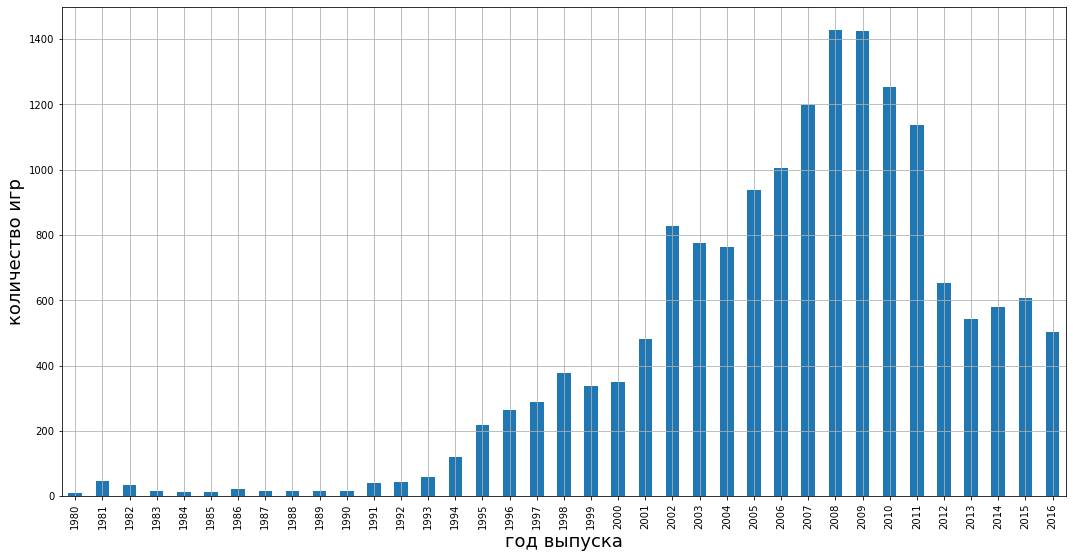

In [28]:
df.groupby('year_of_release')['na_sales'].count().plot(kind='bar', figsize=(18, 9), grid=True)
plt.xlabel('год выпуска', fontsize=18)
plt.ylabel('количество игр', fontsize=18)
plt.show()

По графику зависимости количества игр от года выпуска видно, что вплоть до 1993 года выпускалось очень мало игр в год. Также виден существенный скачок в количестве игр начиная с 2002 года. Пик приходится на 2008 год. Затем игры начинают выпускаться меньше, резкий спад в выпуске игр произошел в 2012 годую С тех пор игровая индустрия еще не вернулась к своим максимальным значениям. 

### Определение количества продаж в зависимости от платформы и анализ платформ с наибольшими суммарными продажами, ответ на вопрос:  **За какой характерный срок появляются новые и исчезают старые платформы?**

Выберем платформы с наибольшими суммарными продажами

In [29]:
# нахождение самых популярных платформ в зависимости от суммарных продаж 
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [30]:
#Способ от ревьюера! 
df['total_sales_1'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df['total_sales_1'] 

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales_1, Length: 16444, dtype: float64

In [31]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).describe()

count      31.000000
mean      284.334516
std       343.954144
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: total_sales, dtype: float64

Примем за самые популярные платформы значения, находящиеся по суммарным продажам за пределами треьего квартиля (75%). Их суммарные продажи больше 301 миллиона проданных копий. 

In [32]:
poular_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']
df_popular_platform = df[df['platform'].isin(poular_platform)]

In [33]:
pivot_platform = pd.pivot_table(df_popular_platform, index=['year_of_release', 'platform'],
               values=['total_sales'], aggfunc='sum').reset_index()

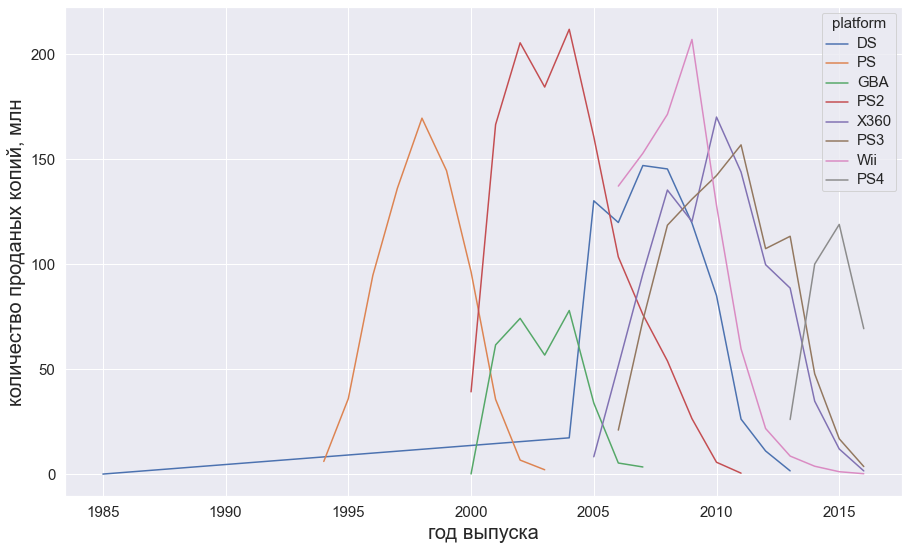

In [34]:
sns.set(rc={'figure.figsize':(15,9)})
# Plot the responses for different events and regions
plot_platform = sns.lineplot(x="year_of_release", y="total_sales",
             hue="platform", 
             data=pivot_platform)

plot_platform.set_xlabel('год выпуска',fontsize=20)
plot_platform.set_ylabel('количество проданых копий, млн',fontsize=20)
plot_platform.tick_params(labelsize=15)
plt.setp(plot_platform.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(plot_platform.get_legend().get_title(), fontsize='15') # for legend title
plt.show()

По графику зависимости общих продаж от года выпуска мы видим, что дольше всех просуществовала платформа DS, однако вплоть до 2004 года было мало продаж игр для нее, а затем произошел резкий скачок, и начиная с 2010 года снова спад.
Платформа PS просуществовала с 1994 до 2003 года - 9 лет, пик продаж пришелся на 1998 год.
Платформа GBA просуществовала с 2000 до 2007 года - 7 лет, пик продаж пришелся на 2004 год.
Платформа PS2 просуществовала с 2000 до 2011 года - 11 лет, пик продаж пришелся на 2004 год.
Платформа X360 просуществовала с 2005 до 2016 года - 11 лет, пик продаж пришелся на 2010 год.
Платформа PS3 просуществовала с 2006 до 2016 года - 10 лет, пик продаж пришелся на 2011 год.
Платформа Wii просуществовала с 2006 до 2016 года - 10 лет, пик продаж пришелся на 2010 год.
Платформа PS4 просуществовала с 2013 до 2016 года - 3 года, пик продаж пришелся на 2015 год.

То, что платформы просуществовали не значит что игр уже не выпускают, просто наш датасет ограничен данными до 2016 года. Можно сделать вывод что в 2016 году продавались игры для платфом X360, PS3, Wii, PS4, и наибольшие продажи были для платформы PS4. 


### Выбор актуального периода данных, которые помогут построить прогноз на 2017 год

Нашей задачей является прогноз рынка на 2017 год, и по графику продаж по платформам видно, что продажи на всех платформах уже идут на спад. По графику продаж видно, что тренд на уменьшение продаж пошел с 2009 года, а затем произошел сильный спад в 2012 году,  плюс рынок игровых платформ достаточно быстро развивается и меняется, поэтому было принято решение анализировать результаты с 2012 по 2016 год. 

<div class="alert alert-info"> <b> Комментарий студента . 
    </b> Спасибо тебе! Такие советы очень полезны для меня новичка, так как мало насмотренности относительно аналитики в разных сферах!!!! </div

In [35]:
years = list(range(2012, 2017, 1))
years

[2012, 2013, 2014, 2015, 2016]

In [36]:
df_actual = df[df['year_of_release'].isin(years)]
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undeff,14.63,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undeff,14.60,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01


### Ответ на вопрос **Какие платформы лидируют по продажам, растут или падают?**

In [37]:
df_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Есть 11 платформ, в которых есть информация о продажах за актуальный промежуток времени - 'PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'PSP'
Посмотрим какие платформы лидируют по продажам, растут или падают.

In [38]:
pivot_actual = pd.pivot_table(df_actual, index=['year_of_release', 'platform'],
               values=['total_sales'], aggfunc='sum').reset_index()

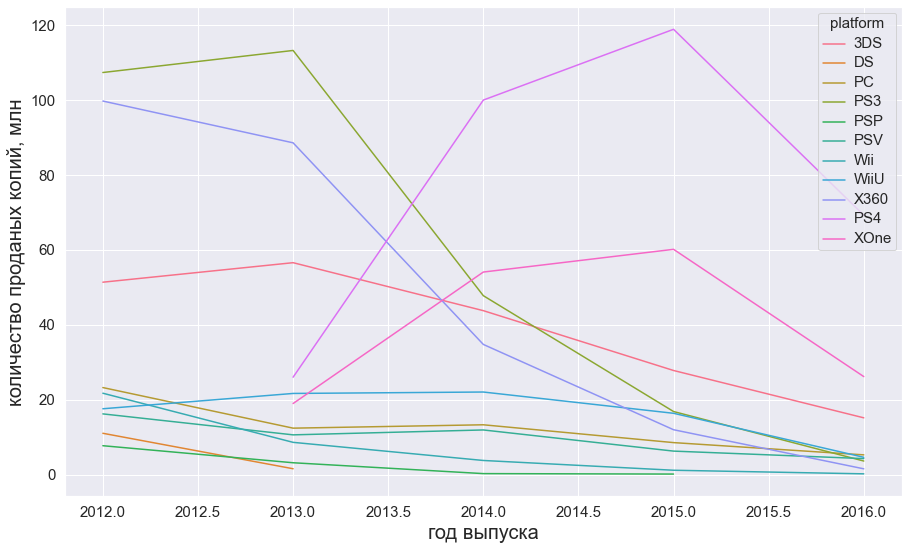

In [39]:
sns.set(rc={'figure.figsize':(15,9)})
# Plot the responses for different events and regions
plot_actual = sns.lineplot(x="year_of_release", y="total_sales",
             hue="platform", 
             data=pivot_actual)

plot_actual.set_xlabel('год выпуска',fontsize=20)
plot_actual.set_ylabel('количество проданых копий, млн',fontsize=20)
plot_actual.tick_params(labelsize=15)
plt.setp(plot_actual.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(plot_actual.get_legend().get_title(), fontsize='15') # for legend title
plt.show()

По графику мы видим, что для всех платформ к 2016 году наблюдается падение продаж. Начиная с 2015 года не осталось ни одной платформы с растущими продажами. Самые "убыточные платформы" - **DS, PCV, PSP**.
К самым прибыльным платформам можно отнести: **PS4, PS3, X360, 3DS, XOne**

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Проанализируем боксплоты для самых прибыльных платформ

In [40]:
platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
df_actual_platforms =  df_actual[df_actual['platform'].isin(platforms)].reset_index()
df_actual_platforms

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1
0,16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05
1,23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27
2,31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undeff,14.63,14.63
3,33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undeff,14.60,14.60
4,34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,16672,metal gear solid v: the definitive experience,XOne,2016,Action,0.01,0.00,0.00,0.00,<NA>,NaN,M,0.01,0.01
1816,16674,tsukigime ranko's longest day,PS3,2014,Action,0.00,0.01,0.00,0.00,<NA>,NaN,undeff,0.01,0.01
1817,16677,aikatsu stars! my special appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
1818,16691,dynasty warriors: eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

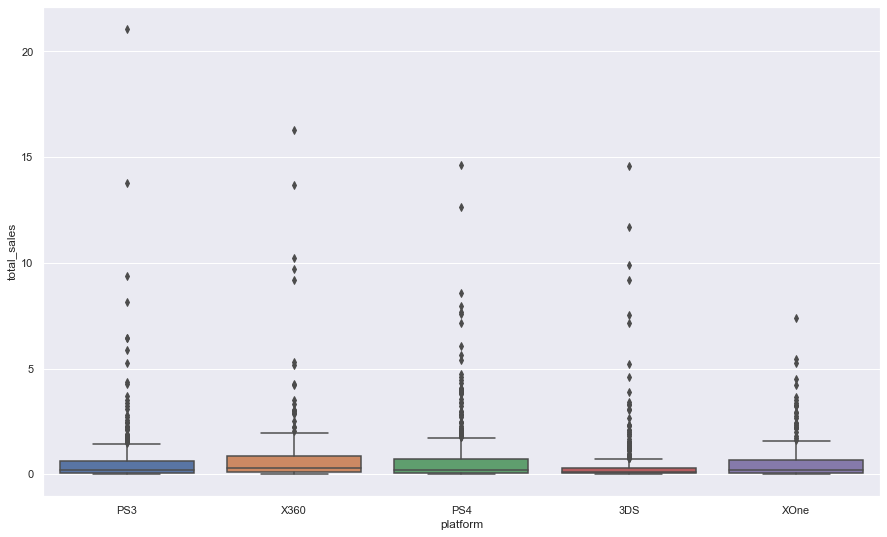

In [41]:
sns.boxplot(y='total_sales', x='platform', data=df_actual_platforms)

Мы видим, что боксплоты сложно интерпретировать так как в данных присутствуют вылеты за усы, однако по вылетам можно сказать, что самые большие значения продаж у PS3, затем у X360, самые маленькие для XOne. Ограничим пределы по y-оси для рассмотрения самих ящиков боксплота. 

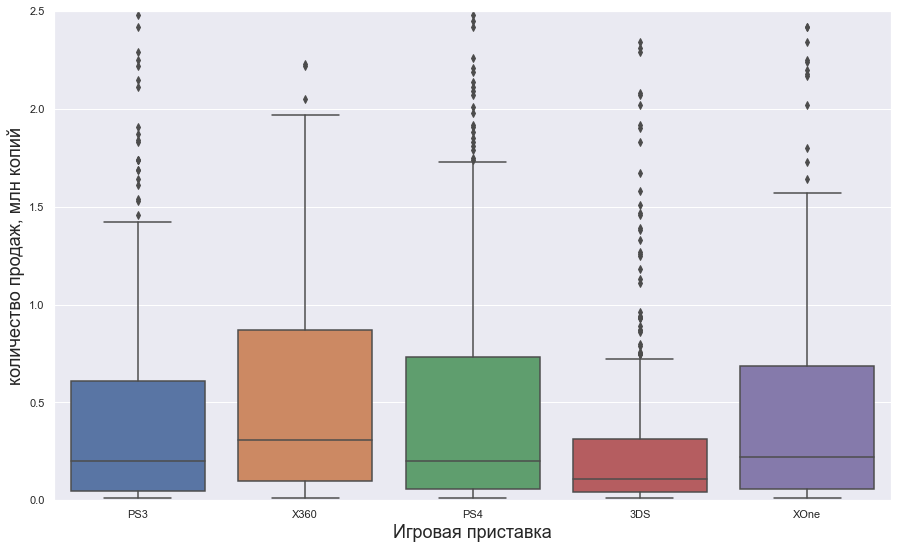

In [42]:
sns.boxplot(y='total_sales', x='platform', data=df_actual_platforms)
plt.ylim(0, 2.5)
plt.xlabel('Игровая приставка', fontsize=18)
plt.ylabel('количество продаж, млн копий', fontsize=18)
plt.show()

Мы видим, что для всех приставок медианные значения смещены ближе к первому квартилю, то есть распределения являются скошенными в положительную сторону. Наименьший межквартильный размах для приставки 3DS, наибольший для X360. Самое большое медианное значение для приставки X360, самое маленькое для 3DS. 

### Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков с помощью диаграммы рассеяния и  корреляции между отзывами и продажами. Сравнение с продажами на других платформах.

Будем работать с датасетом **df_rating** в котором отсутствуют значения Nan по отзывам.

Возьмем наиболее популярную платформу **PS4**, построим диаграмму рассеяния и посмотрим на корреляцию между отзывами и продажами. 

In [43]:
df_rating['total_sales'] = df_rating['na_sales'] + df_rating['eu_sales'] + df_rating['jp_sales'] + df_rating['other_sales']

<ipython-input-43-f2cb92e24946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['total_sales'] = df_rating['na_sales'] + df_rating['eu_sales'] + df_rating['jp_sales'] + df_rating['other_sales']


In [44]:
df_ps4 = df_rating[df_rating['platform'] == 'PS4']
df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


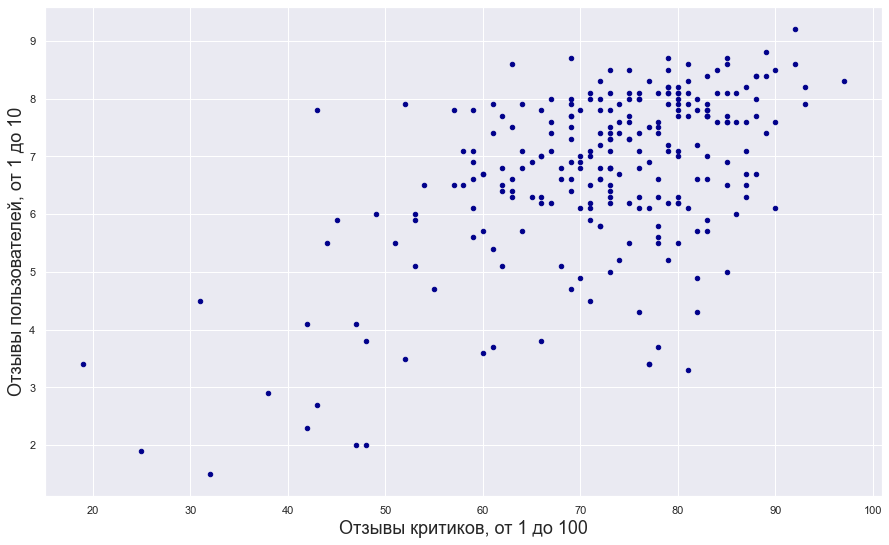

In [45]:
df_ps4.plot.scatter(x='critic_score',y='user_score', c='DarkBlue')
plt.xlabel('Отзывы критиков, от 1 до 100', fontsize=18)
plt.ylabel('Отзывы пользователей, от 1 до 10', fontsize=18)
plt.show()

Мы видим, что между отзывами критиков и пользователей наблюдается положительная корреляция, основное облако точек сосредоточено в области с отзывами критиков 60-90 и отзывами пользователей 6-8. Посмотрим на диаграммы рассеяния между отзывами и общими продажами. 

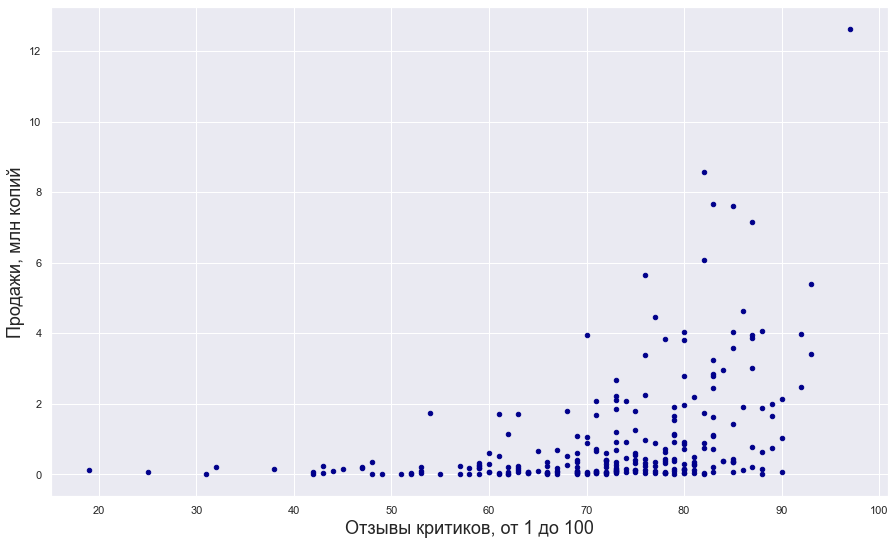

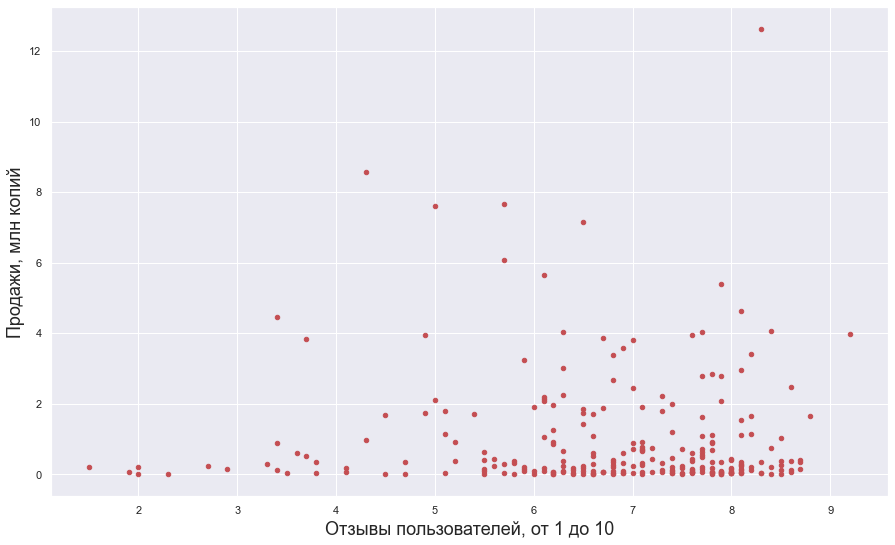

In [46]:
df_ps4.plot.scatter(x='critic_score',y='total_sales', c='DarkBlue')
plt.xlabel('Отзывы критиков, от 1 до 100', fontsize=18)
plt.ylabel('Продажи, млн копий', fontsize=18)
df_ps4.plot.scatter(x='user_score',y='total_sales', c='r')
plt.xlabel('Отзывы пользователей, от 1 до 10', fontsize=18)
plt.ylabel('Продажи, млн копий', fontsize=18)
plt.show()

По диаграммам рассеяния видно, что продажи зависят от оценки критиков и пользователей. Чем меньше оценки, тем меньше продаются копии игр. Для оценок критиков видно, что продажи возрастают начиная с оценки 60, аналогично для оценок пользователей, оценки возрастают при оценке пользователей больше 3. Лично мне кажется, как будто покупатели чуть больше доверяют высоким оценкам от критиков, так как при маленький оценках пользователей 3, 4, 5 все равно есть значения больших продаж. Посмотрим на коэффициенты корреляции. 

In [47]:
df_ps4[['critic_score','user_score', 'total_sales']].corr().style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


По коэффициентам корреляции видно, что существует положительная небольшая корреляция 0.4 для общих продаж и оценки критиков. Однако также существует положительная корреляция 0.55 между оценками пользователей и оценками критиков. Как мне кажется, что пользователи опираются на оценки критиков когда пишут свои отзывы и ставят оценки, как на авторитетное мнение. 

### Соотношение с продажами игр на других платформах

Теперь рассмотрим зависимость для других 4-х популярных платформ

In [48]:
platforms4 = ['PS3', 'X360', '3DS', 'XOne']
df_pop_platf = df_rating[df_rating['platform'].isin(platforms4)].reset_index()
df_pop_platf = df_pop_platf[['platform','critic_score','user_score', 'total_sales']]

In [49]:
for i in platforms4:
    a = df_pop_platf[df_pop_platf['platform'] == i].corr().style.background_gradient(cmap='coolwarm')
    print('platform', i)
    display(a)

platform PS3


,critic_score,user_score,total_sales
critic_score,1.000000,0.631154,0.428213
user_score,0.631154,1.000000,0.143978
total_sales,0.428213,0.143978,1.000000


platform X360


,critic_score,user_score,total_sales
critic_score,1.000000,0.625020,0.388992
user_score,0.625020,1.000000,0.110280
total_sales,0.388992,0.110280,1.000000


platform 3DS


,critic_score,user_score,total_sales
critic_score,1.000000,0.745222,0.338904
user_score,0.745222,1.000000,0.232089
total_sales,0.338904,0.232089,1.000000


platform XOne


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
total_sales,0.410422,-0.094003,1.000000


Самая высокая корреляция 0.75 наблюдается для зависимости между оценками критиков и пользователей для плаформы 3DS. Также высокие корреляции оценок наблюдаются для платформ PS3 и X360. Корреляция между продажами и оценками критиков всегда больше (от 0.34 до 0.43) чем корреляция между продажами и оценками пользователей (от -0.09 (отрицательная корреляция XOne значит что чем лучше отзыв тем меньше продажи :D но она слава богу почти нулевая) до 0.23). Можно сказать что покупатели больше опираются на оценку критиков чем на оценку пользователей во всех случаях. 

### Ответы на вопросы Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для ответа на данный вопрос снова вернемся к нашему датасету с актуальными годами и прибыльными платформами **df_actual_platforms**. Посмотрим на общее распределение по жанрам. 

In [50]:
df_actual_platforms

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1
0,16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05
1,23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27
2,31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undeff,14.63,14.63
3,33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undeff,14.60,14.60
4,34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,16672,metal gear solid v: the definitive experience,XOne,2016,Action,0.01,0.00,0.00,0.00,<NA>,NaN,M,0.01,0.01
1816,16674,tsukigime ranko's longest day,PS3,2014,Action,0.00,0.01,0.00,0.00,<NA>,NaN,undeff,0.01,0.01
1817,16677,aikatsu stars! my special appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
1818,16691,dynasty warriors: eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01


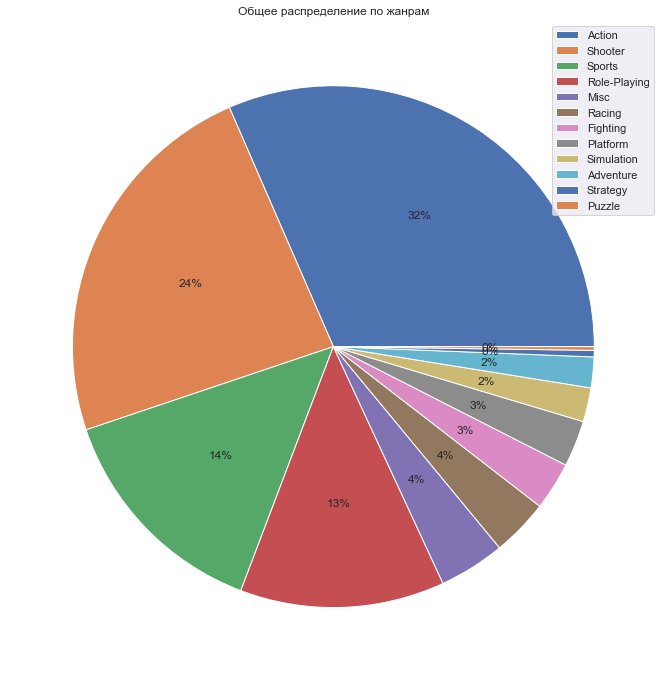

In [51]:
df_actual_platforms.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='pie', labels=None, label='',
                        autopct='%1.0f%%', legend=True, figsize=(15,12), title='Общее распределение по жанрам')
plt.show()

Из круговой диаграммы видно, что топ 4 популярных жанров:
1. Action - 32 %
2. Shooter - 24 %
3. Sports - 14 %
4. Role-playing - 13 %


К самым непопулярным жанрам относятся:
1. Puzzle < 1 %
2. Strategy < 1 %
3. Adventure - 2 %
4. Simulation - 2 %

### Выводы по исследовательскому анализу

1. Для установления актуального периода для прогноза за 2017 год мы проанализировали график зависимости количества игр от года выпуска и увидели, что с 2008 года наблюдается спад в продаже игр (в 2012 спад стал более резким). По графику зависимости общих продаж от года выпуска мы видим, что дольше всех просуществовала платформа DS, однако вплоть до 2004 года было мало продаж игр для нее, а затем произошел резкий скачок, и начиная с 2010 года снова спад. Платформа PS просуществовала с 1994 до 2003 года - 9 лет, пик продаж пришелся на 1998 год. Платформа GBA просуществовала с 2000 до 2007 года - 7 лет, пик продаж пришелся на 2004 год. Платформа PS2 просуществовала с 2000 до 2011 года - 11 лет, пик продаж пришелся на 2004 год. Платформа X360 просуществовала с 2005 до 2016 года - 11 лет, пик продаж пришелся на 2010 год. Платформа PS3 просуществовала с 2006 до 2016 года - 10 лет, пик продаж пришелся на 2011 год. Платформа Wii просуществовала с 2006 до 2016 года - 10 лет, пик продаж пришелся на 2010 год. Платформа PS4 просуществовала с 2013 до 2016 года - 3 года, пик продаж пришелся на 2015 год. **Было принято решение анализировать данные с 2012 по 2016 год**.


2. По графику количества продаж от года выпуска для разных платформ мы видим, что для всех платформ к 2016 году наблюдается падение продаж. Начиная с 2015 года не осталось ни одной платформы с растущими продажами. Самые "убыточные платформы" - DS, PCV, PSP. К самым прибыльным платформам можно отнести: PS4, PS3, X360, 3DS, XOne. По боксплотам для популярных платфом мы видим, что для всех приставок медианные значения смещены ближе к первому квартилю, то есть распределения являются скошенными в положительную сторону. Наименьший межквартильный размах для приставки 3DS, наибольший для X360. Самое большое медианное значение для приставки X360, самое маленькое для 3DS.


3. Затем была проанализирована самая популярная платформа - PS4. Для нее наблюдается положительная корреляция  между отзывами критиков и пользователей, основное облако точек сосредоточено в области с отзывами критиков 60-90 и отзывами пользователей 6-8. По диаграммам рассеяния видно, что продажи зависят от оценки критиков и пользователей. Чем меньше оценки, тем меньше продаются копии игр. Для оценок критиков видно, что продажи возрастают начиная с оценки 60, аналогично для оценок пользователей, оценки возрастают при оценке пользователей больше 3. Лично мне кажется, как будто покупатели чуть больше доверяют высоким оценкам от критиков, так как при маленький оценках пользователей 3, 4, 5 все равно есть значения больших продаж. По корреляции видно, что существует положительная небольшая корреляция 0.4 для общих продаж и оценки критиков. Однако также существует положительная корреляция 0.55 между оценками пользователей и оценками критиков. Как мне кажется, что пользователи опираются на оценки критиков когда пишут свои отзывы и ставят оценки, как на авторитетное мнение.


4. Далее были рассмотрены корреляции для других 4 популярных платформ. Самая высокая корреляция 0.75 наблюдается для зависимости между оценками критиков и пользователей для плаформы 3DS. Также высокие корреляции оценок наблюдаются для платформ PS3 и X360. Корреляция между продажами и оценками критиков всегда больше (от 0.34 до 0.43) чем корреляция между продажами и оценками пользователей (от -0.09 (отрицательная корреляция XOne значит что чем лучше отзыв тем меньше продажи :D но она слава богу почти нулевая) до 0.23). Можно сказать что покупатели больше опираются на оценку критиков чем на оценку пользователей во всех случаях.


5. Из круговой диаграммы видно, что топ 4 популярных жанров: Action - 32 %, Shooter - 24 %, Sports - 14 %, Role-playing - 13 %
К самым непопулярным жанрам относятся: Puzzle < 1 %, Strategy < 1 %, Adventure - 2 %, Simulation - 2 %

## Портрет пользователей каждого региона

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Регион NA - Северная Америка

Посмотрим на популярные платформы в Северной Америке

In [52]:
df_actual[df_actual['na_sales'] != 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undeff,14.63,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undeff,14.60,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,balloon pop 2,3DS,2012,Puzzle,0.01,0.00,0.00,0.00,<NA>,NaN,E,0.01,0.01
16618,xblaze: lost memories,PSV,2015,Adventure,0.01,0.00,0.00,0.00,<NA>,7.0,M,0.01,0.01
16660,prison architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,undeff,0.01,0.01
16672,metal gear solid v: the definitive experience,XOne,2016,Action,0.01,0.00,0.00,0.00,<NA>,NaN,M,0.01,0.01


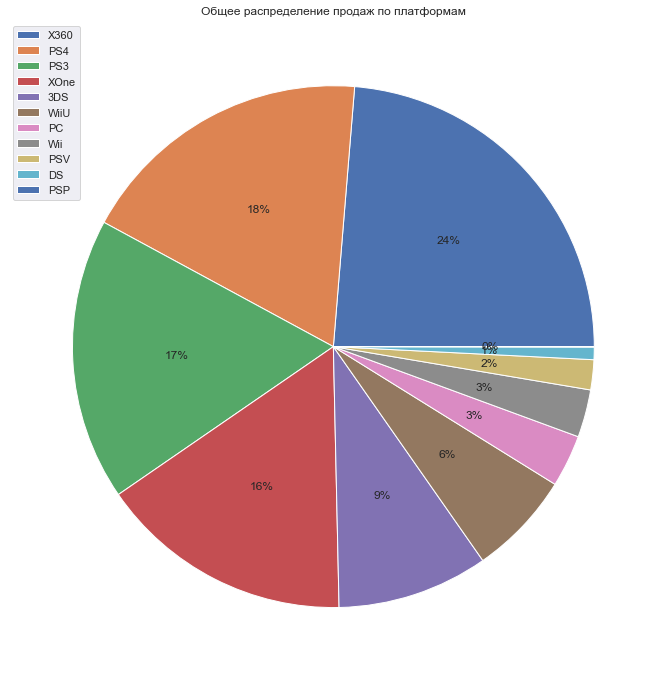

In [53]:
df_actual[df_actual['na_sales'] != 0].groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', labels=None, label='',
                        autopct='%1.0f%%', legend=True, figsize=(15,12), title='Общее распределение продаж по платформам')
plt.show()

В Северной Америке топ 5 популярных платформ: X360 - 24 %, PS4 - 18 %, PS3 - 17 %, XOne - 16 %, 3DS - 9%.

Топ 5 непопулярных платформ - PSP < 1%, DS - 1%, PSV - 2 %, Wii - 3 %, PC - 3 %. 

Теперь посмотрим на актуальные жанры

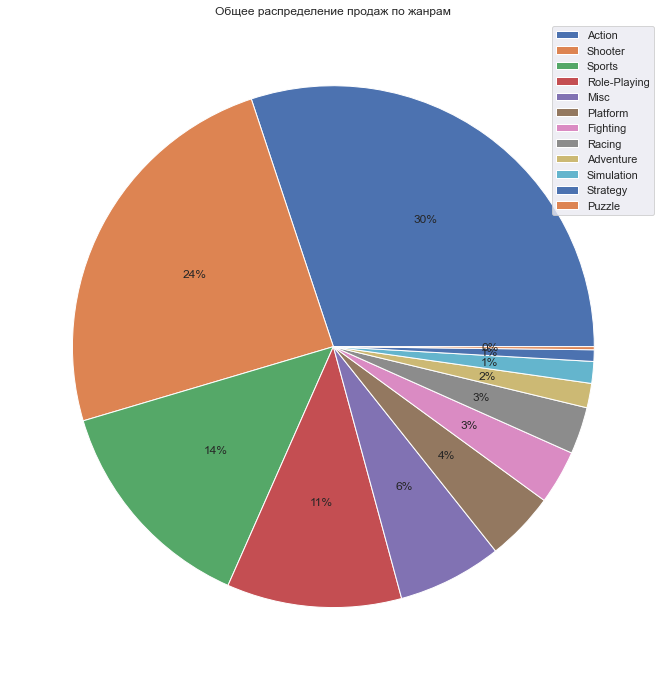

In [54]:
df_actual[df_actual['na_sales'] != 0].groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', labels=None, label='',
                        autopct='%1.0f%%', legend=True, figsize=(15,12), title='Общее распределение продаж по жанрам')
plt.show()

В Северной Америке топ 5 популярных жанров: Action - 30 %, Shooter - 24 %, Sports - 14 %, Role-Playing - 11 %, Misc - 6%.

Топ 5 непопулярных жанров - Puzzle < 1%, Strategy - 1%, Simulation - 1 %, Adventure - 2 %, Racing - 3 %. 

И посмотрим на зависимость продаж от рейтинга ESRB

Text(0, 0.5, 'Продажи, млн копий')

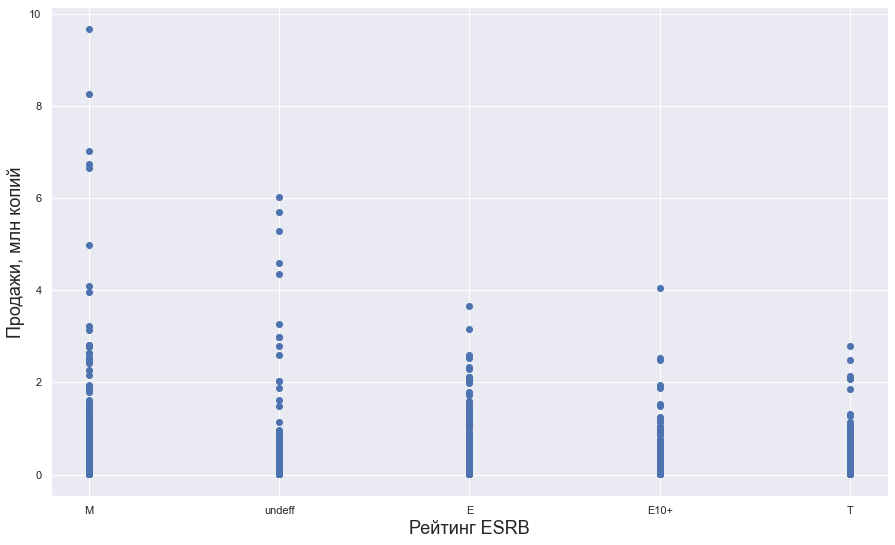

In [55]:
plt.scatter(x=df_actual[df_actual['na_sales'] != 0]['rating'],y=df_actual[df_actual['na_sales'] != 0]['na_sales'])
plt.xlabel('Рейтинг ESRB', fontsize=18)
plt.ylabel('Продажи, млн копий', fontsize=18)

Мы видим, что наибольшее количество проданных игр в Северной Америке принадлежит к категории М - Mature - игры для взрослых. Наименьшее количество продаж в жанре Т - Teen - для тинейджеров. 

###  Регион EU - Eвропа

In [56]:
df_actual[df_actual['eu_sales'] != 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undeff,14.63,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undeff,14.60,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,zombiu,XOne,2016,Action,0.00,0.01,0.00,0.00,<NA>,NaN,undeff,0.01,0.01
16652,fast racing neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01,0.01
16654,ben 10 omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,<NA>,5.1,E10+,0.01,0.01
16674,tsukigime ranko's longest day,PS3,2014,Action,0.00,0.01,0.00,0.00,<NA>,NaN,undeff,0.01,0.01


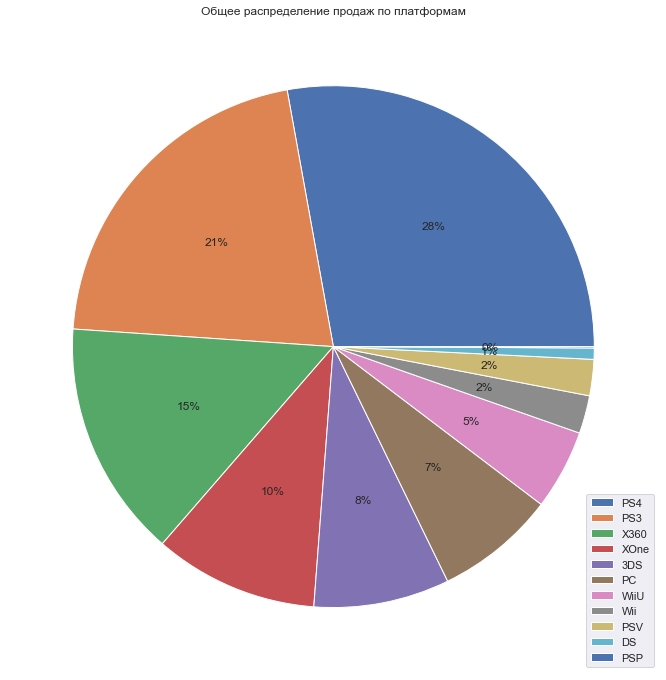

In [57]:
df_actual[df_actual['eu_sales'] != 0].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', labels=None, label='',
                        autopct='%1.0f%%', legend=True, figsize=(15,12), title='Общее распределение продаж по платформам')
plt.show()

В Европе топ 5 популярных платформ:  PS4 - 28 %, PS3 - 21 %, X360 - 15 %, XOne - 10 %, 3DS - 8%.

Топ 5 непопулярных платформ - PSP < 1%, DS - 1%, PSV - 2 %, Wii - 2 %, WiiU - 5 %. 

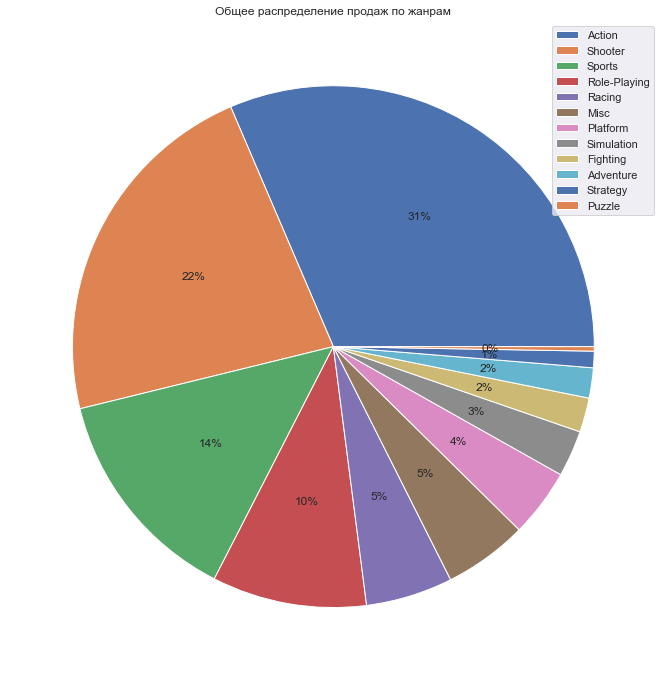

In [58]:
df_actual[df_actual['eu_sales'] != 0].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', labels=None, label='',
                        autopct='%1.0f%%', legend=True, figsize=(15,12), title='Общее распределение продаж по жанрам')
plt.show()

В Европе топ 5 популярных жанров: Action - 31 %, Shooter - 22 %, Sports - 14 %, Role-Playing - 10 %, Racing - 5%.

Топ 5 непопулярных жанров - Puzzle < 1%, Strategy - 1%, Adventure - 2 %,  Fighting - 2 %, Simulation - 3 %. 

In [59]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   Int64  
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
 12  total_sales_1    2886 non-null   float64
dtypes: Int64(2), float64(7), object(4)
memory usage: 321.3+ KB


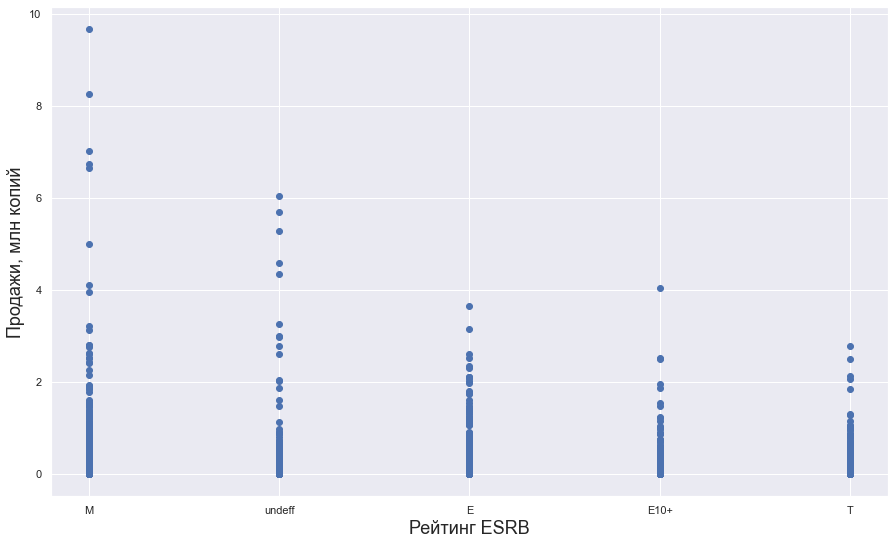

In [60]:
plt.scatter(x=df_actual[df_actual['eu_sales'] != 0]['rating'],y=df_actual[df_actual['eu_sales'] != 0]['na_sales'])
plt.xlabel('Рейтинг ESRB', fontsize=18)
plt.ylabel('Продажи, млн копий', fontsize=18)
plt.show()

Наибольшее количество проданных игр в Европе принадлежит к категории М - Mature - игры для взрослых. Наименьшее количество продаж в жанре E10+ -игры категории 10 + лет. 

### Регион JP - Япония

In [61]:
df_actual[df_actual['jp_sales'] != 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undeff,14.63,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undeff,14.60,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undeff,0.01,0.01


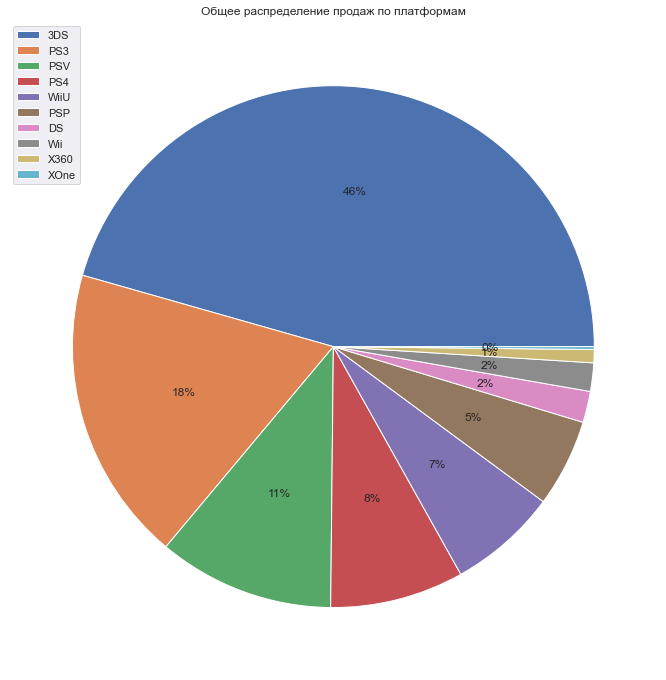

In [62]:
df_actual[df_actual['jp_sales'] != 0].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', labels=None, label='',
                        autopct='%1.0f%%', legend=True, figsize=(15,12), title='Общее распределение продаж по платформам')
plt.show()

В Японии топ 5 популярных платформ: 3DS - 46 %, PS3 - 18 %, PSV - 11 %, PS4 - 8 %, WiiU - 7 %.

Топ 5 непопулярных платформ - XOne < 1%, X360 - 1%, Wii - 2 %, DS - 2 %, PSP - 5 %. 

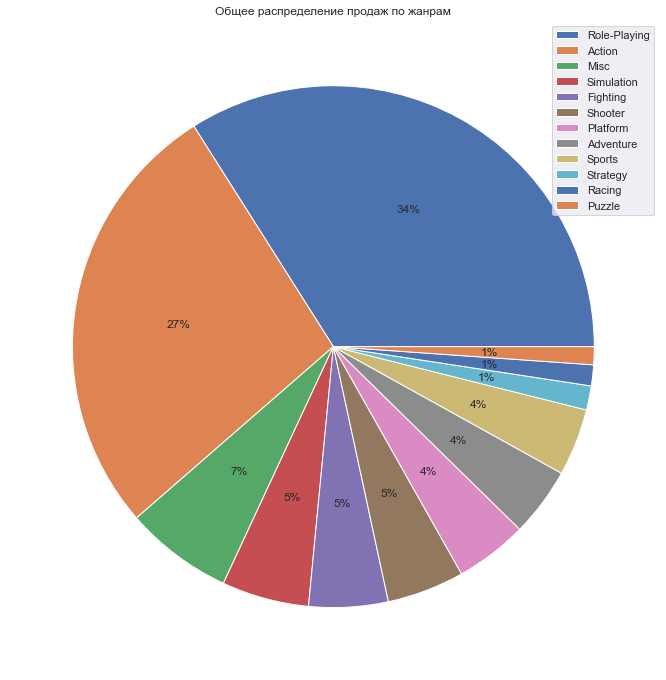

In [63]:
df_actual[df_actual['jp_sales'] != 0].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', labels=None, label='',
                        autopct='%1.0f%%', legend=True, figsize=(15,12), title='Общее распределение продаж по жанрам')
plt.show()

В Японии топ 5 популярных жанров: Role-Playing - 34 %, Action - 27 %, Misc - 7 %, Simulation - 5 %, Fighting - 5%.

Топ 5 непопулярных жанров - Puzzle 1%, Racing - 1%, Strategy - 1 %,  Sports - 4 %, Adventure - 4 %. 

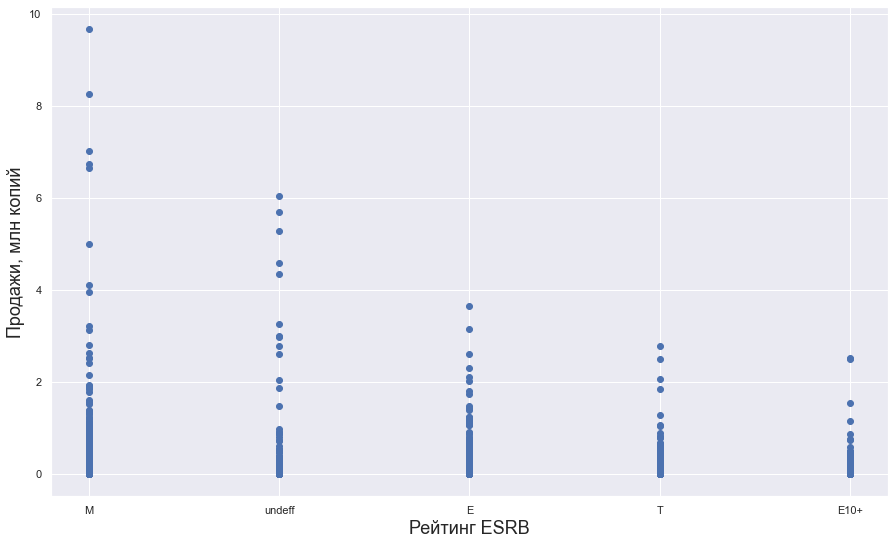

In [64]:
plt.scatter(x=df_actual[df_actual['jp_sales'] != 0]['rating'],y=df_actual[df_actual['jp_sales'] != 0]['na_sales'])
plt.xlabel('Рейтинг ESRB', fontsize=18)
plt.ylabel('Продажи, млн копий', fontsize=18)
plt.show()

Наибольшее количество проданных игр в Японии принадлежит к категории undeff - данные с пропусками. Наименьшее количество продаж в жанре E10+ -игры категории 10 + лет. 

### Вывод портреты пользователей

1. В Северной Америке топ 5 популярных платформ: **X360 - 24 %, PS4 - 18 %, PS3 - 17 %, XOne - 16 %, 3DS - 9%**. Топ 5 непопулярных платформ - **PSP < 1%, DS - 1%, PSV - 2 %, Wii - 3 %, PC - 3 %**.  В Северной Америке топ 5 популярных жанров: **Action - 30 %, Shooter - 24 %, Sports - 14 %, Role-Playing - 11 %, Misc - 6%**. Топ 5 непопулярных жанров - **Puzzle < 1%, Strategy - 1%, Simulation - 1 %, Adventure - 2 %, Racing - 3 %**. Наибольшее количество проданных игр в Северной Америке принадлежит к категории М - Mature - игры для взрослых. Наименьшее количество продаж в жанре Т - Teen - для тинейджеров.

2. В Европе топ 5 популярных платформ:  **PS4 - 28 %, PS3 - 21 %, X360 - 15 %, XOne - 10 %, 3DS - 8%**. Топ 5 непопулярных платформ - **PSP < 1%, DS - 1%, PSV - 2 %, Wii - 2 %, WiiU - 5 %**.  В Европе топ 5 популярных жанров: **Action - 31 %, Shooter - 22 %, Sports - 14 %, Role-Playing - 10 %, Racing - 5%**. Топ 5 непопулярных жанров - **Puzzle < 1%, Strategy - 1%, Adventure - 2 %, Fighting - 2 %, Simulation - 3 %**. Наибольшее количество проданных игр в Европе принадлежит к категории М - Mature - игры для взрослых. Наименьшее количество продаж в жанре E10+ -игры категории 10 + лет. 

3. В Японии топ 5 популярных платформ: **3DS - 46 %, PS3 - 18 %, PSV - 11 %, PS4 - 8 %, WiiU - 7 %**. Топ 5 непопулярных платформ - **XOne < 1%, X360 - 1%, Wii - 2 %, DS - 2 %, PSP - 5 %**. В Японии топ 5 популярных жанров: **Role-Playing - 34 %, Action - 27 %, Misc - 7 %, Simulation - 5 %, Fighting - 5%**. Топ 5 непопулярных жанров - **Puzzle 1%, Racing - 1%, Strategy - 1 %, Sports - 4 %, Adventure - 4 %**. Наибольшее количество проданных игр в Японии принадлежит к категории undeff - данные с пропусками. Наименьшее количество продаж в жанре E10+ -игры категории 10 + лет.

4. Мы видим что портреты пользователей из Северной Америки и Европы отосительно похожи, правда в Европе лидируют приставки PS4, PS3, а в Америке лидирует X360. Также в топ пять Европейского пользователя попали игры - гонки racing (у американцев гонки в рейтинге самых непопулярных), когда у Американского пользователя там категория Miscellaneous game - игры не вошедшие ни в один класс. Европейцы меньше всего покупают игры категории 10+, а американцы игры для тинейджеров. 

5. Портрет японского покупателя кардинально отличается. С огромным отрывом в япониии лидирует их отечественная приставка Nintendo 3DS, у американцев и европейцев она тоже в топе, но на последнем месте. Меньше всего японцы жалуют  X360 и XOne, хотя приставка X360 находится на первом месте для Северной Америки и на третьем месте по Европе, и занимает третье место в мире. Также у них совершенно отличается рейтинг игр, больше всего в Японии любят ролевые игры, что неудивительно, ведь Япония это родина косплея и аниме. Японцы как и все любит action игры, однако не жалут шутеры. Также японцы не любят игры жанра спорт, хотя у Европейцев данный жанр на третьем месте.

6. Абсолютно все не любят играть в пазлы :( 

In [65]:
# комментарий ревьюера

def visualization(df, region):
    df[region] = df[region].dropna()
    fig = plt.figure(figsize=(10,25))
    df1 = df.groupby('platform')[region].sum().sort_values(ascending=False)
    df2 = df.groupby('genre')[region].sum().sort_values(ascending=False)
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    plt.subplot(3, 1,1)
    plot_1 = df1.plot(subplots=True, kind='pie', labels=None, label='',
                        autopct='%1.0f%%',  figsize=(15,12))
    plt.subplot(3, 1,2)
    plot_2 = df2.plot( subplots=True, kind='pie', labels=None, label='',
                        autopct='%1.0f%%', figsize=(15,12))
    plt.subplot(3, 1, 3)
    plot_3 = plt.scatter(x=df_actual[df_actual['jp_sales'] != 0]['rating'],y=df_actual[df_actual['jp_sales'] != 0]['na_sales'])
    ax1.title.set_text('Общее распределение продаж по платформам')
    ax2.title.set_text('Общее распределение продаж по жанрам')
    ax3.title.set_text('Распределение рейтинга')
    plt.show();

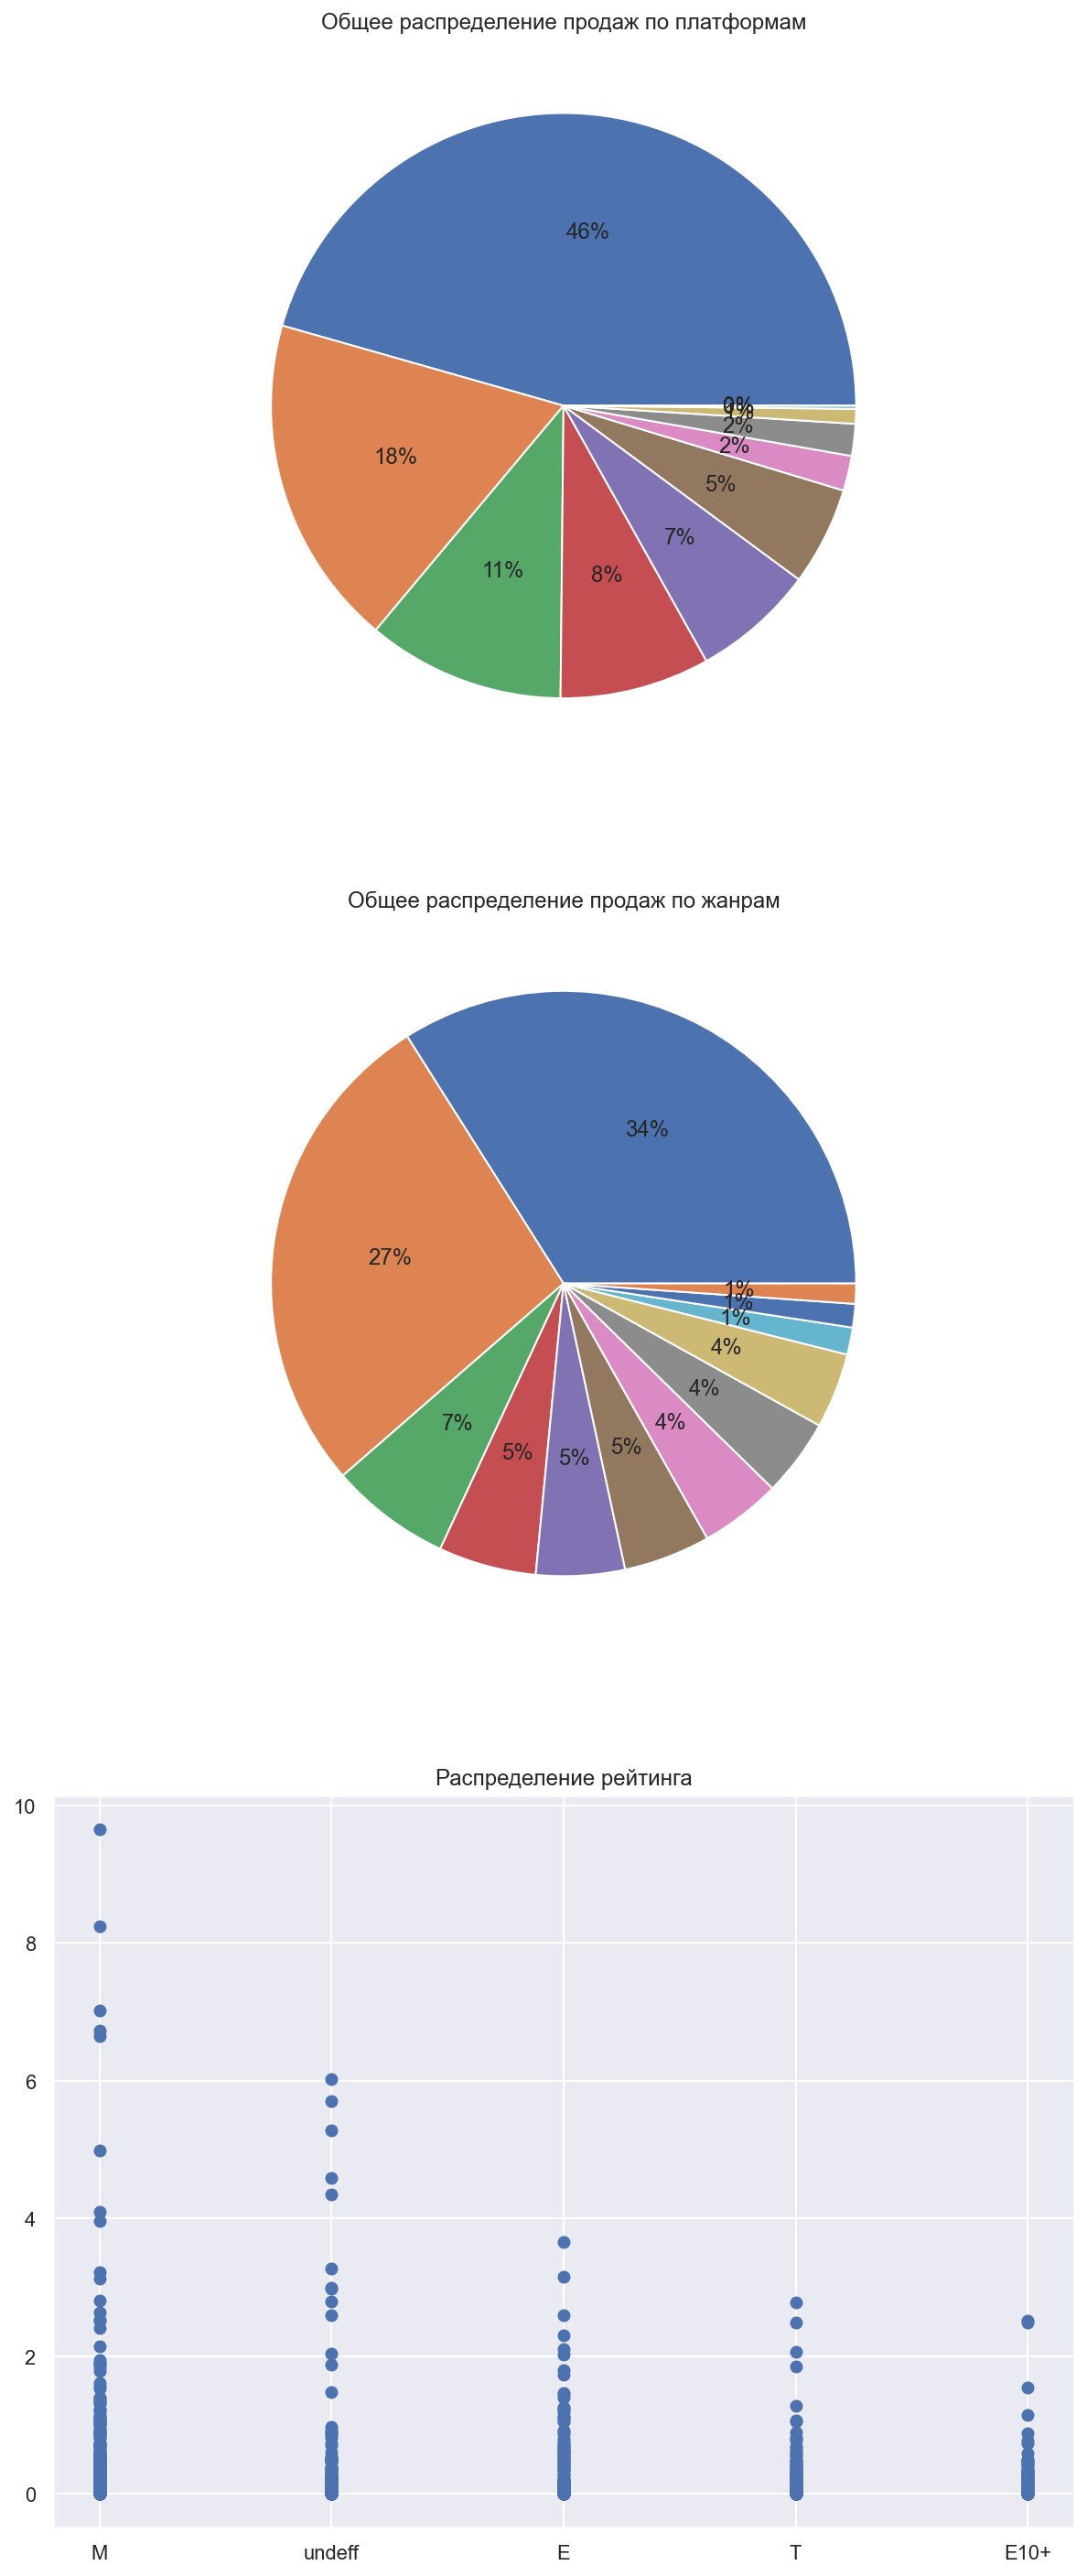

In [66]:
# комментарий ревьюера
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
visualization(df_actual, region = 'jp_sales')

## Проверка гипотез

###  **Нулевая гипотеза** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Выделим пользовательские рейтинги и посчитаем для них t-тест Стюдента для несвязанных выборок. Перд этим удалим пропуски из данных. 

In [67]:
df_pc_user_score = df_actual[df_actual['platform'] == 'PC']['user_score']
df_xone_user_score = df_actual[df_actual['platform'] == 'XOne']['user_score']

In [68]:
df_pc_user_score = df_pc_user_score.dropna()
df_xone_user_score = df_xone_user_score.dropna()

In [69]:
display(df_pc_user_score.var())
df_xone_user_score.var()

2.7704439971584156

1.9069968429360702

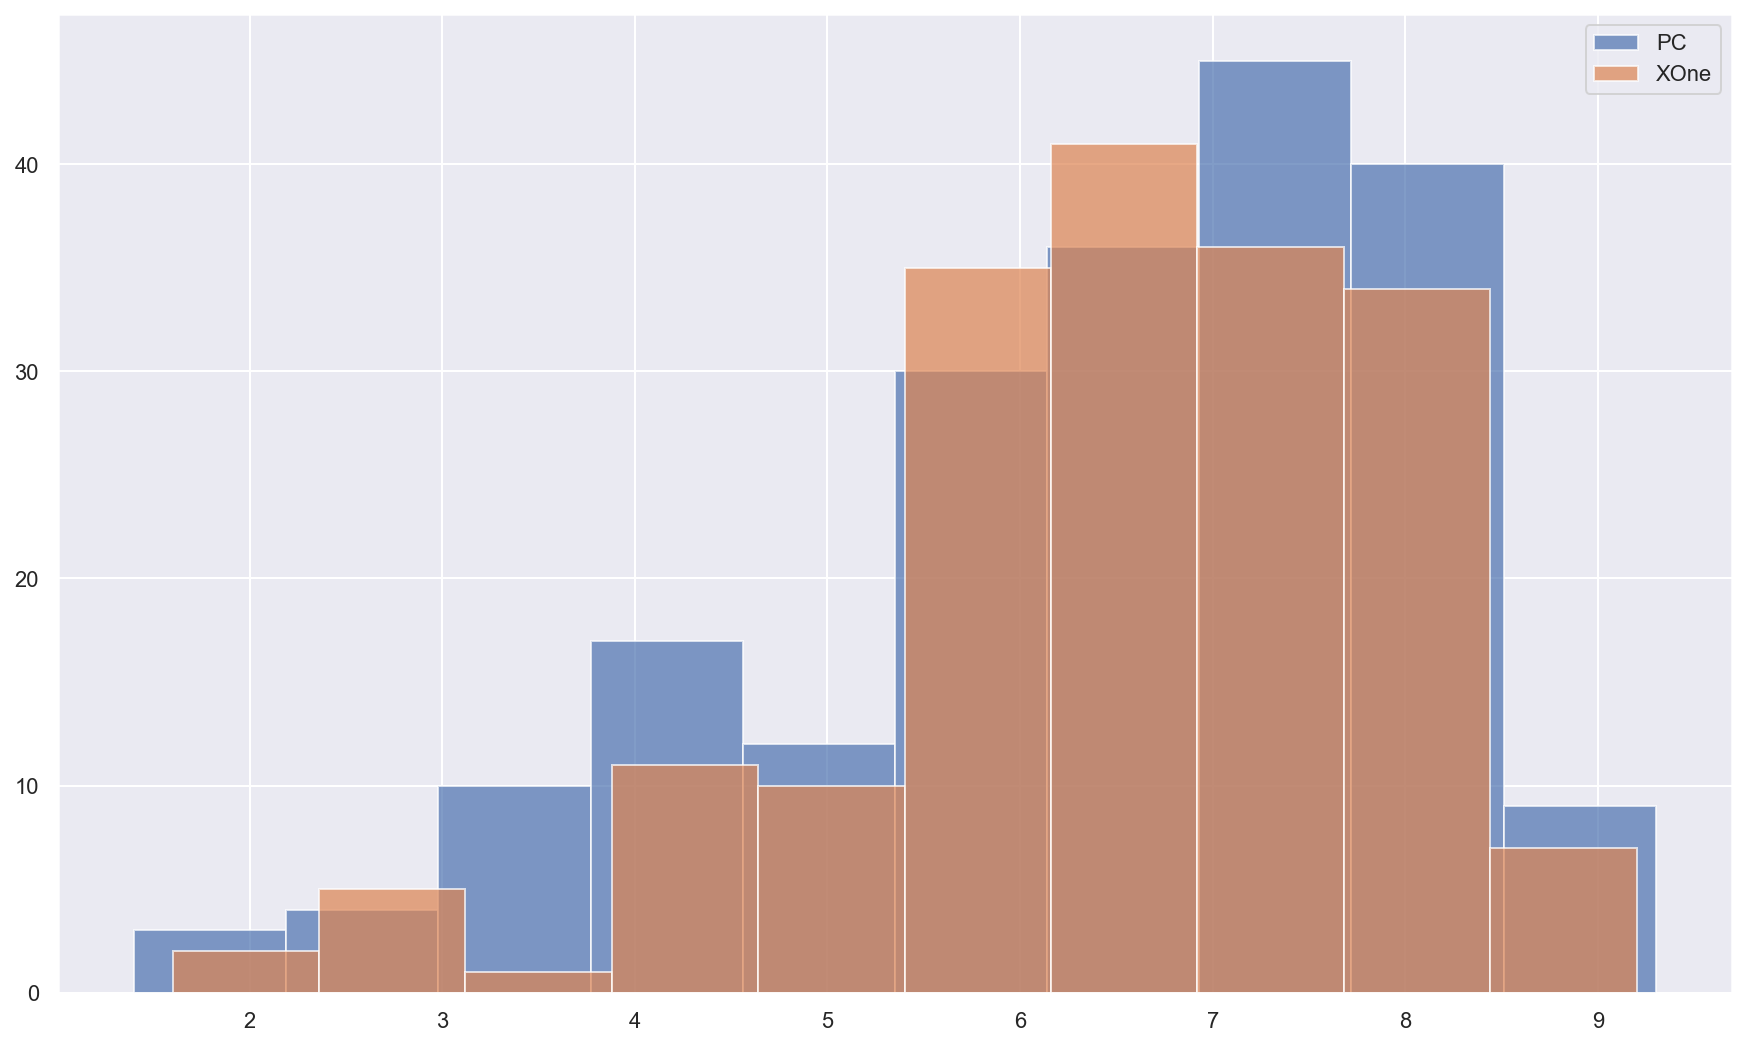

In [70]:
df_pc_user_score.hist(alpha=0.7, label='PC')
df_xone_user_score.hist(alpha=0.7, label='XOne')
plt.legend()
plt.show()

Поскольку дисперсии разные поставим параметр equal_var=False

In [71]:
alpha = 0.05
results = st.ttest_ind(
    df_pc_user_score, 
    df_xone_user_score, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Таким образом, нам не удалось отвергнуть нулевую гипотезу, а значит, что **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

**Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [72]:
action_user_score = df_actual[df_actual['genre'] == 'Action']['user_score'].dropna()
sports_user_score = df_actual[df_actual['genre'] == 'Sports']['user_score'].dropna()

In [73]:
display(action_user_score.var())
sports_user_score.var()

1.8890840494348116

3.022890298704733

Поскольку дисперсии разные поставим параметр equal_var=False

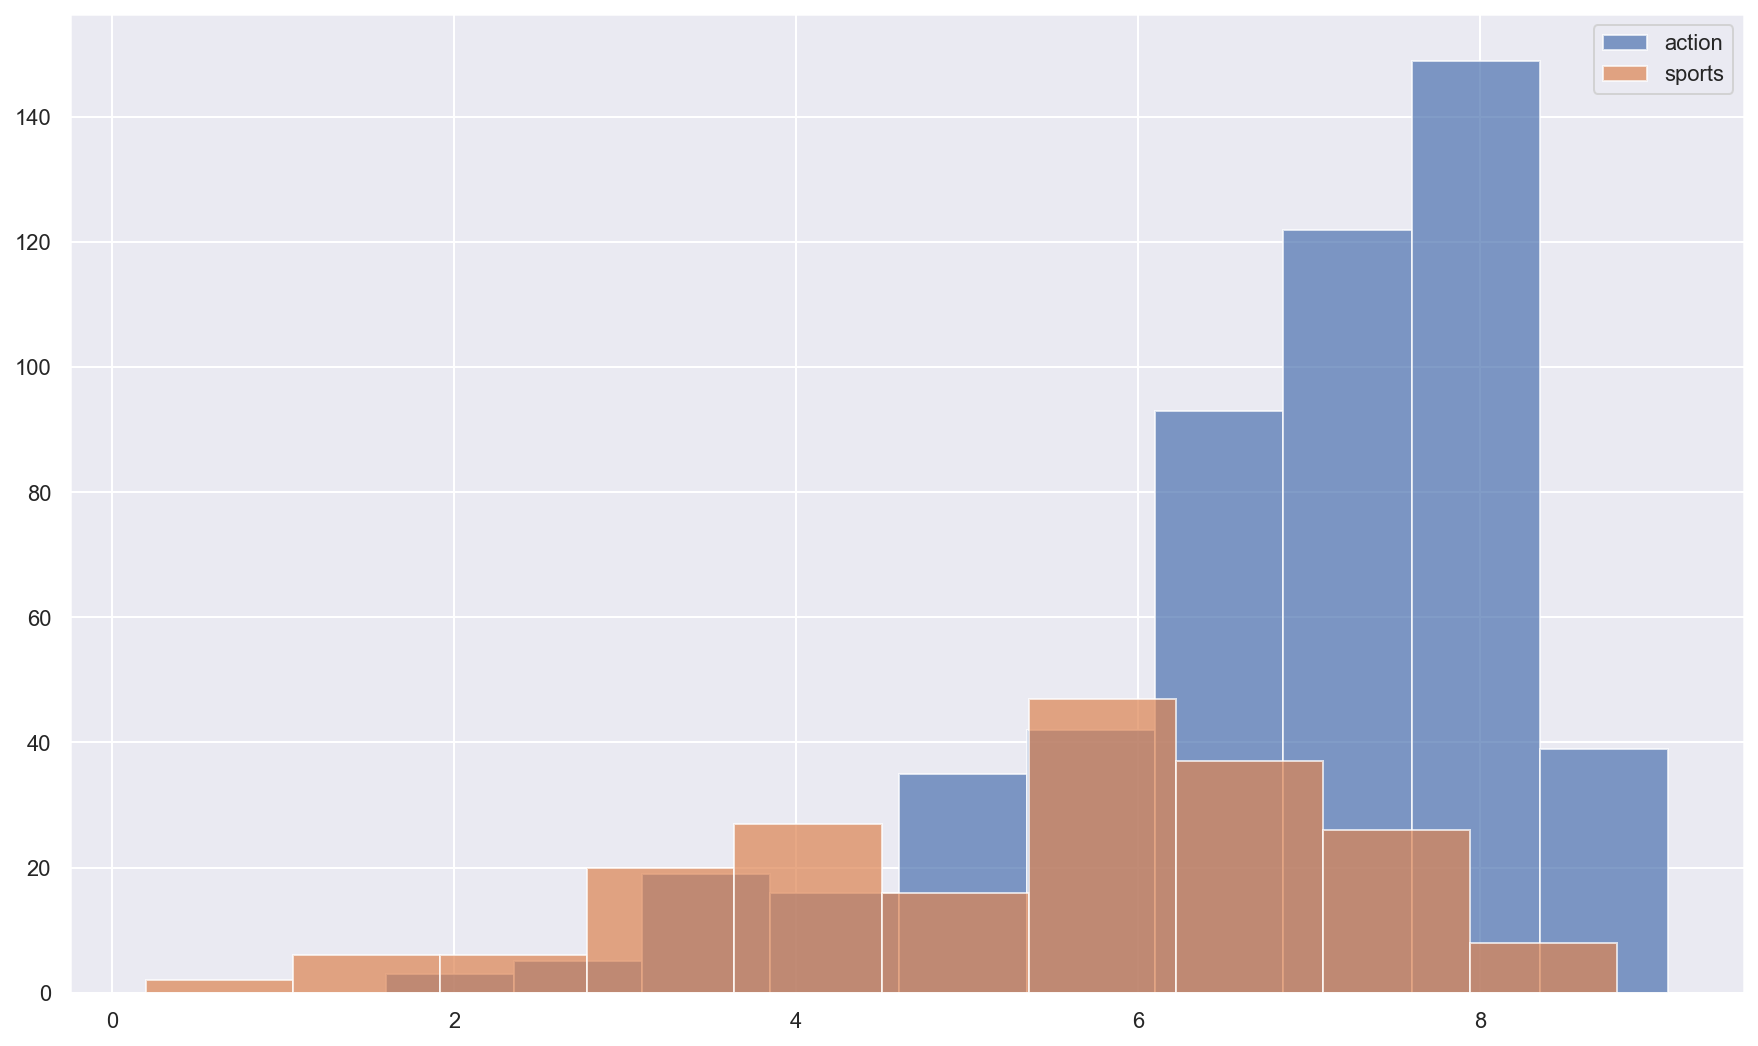

In [74]:
action_user_score.hist(alpha=0.7, label='action')
sports_user_score.hist(alpha=0.7, label='sports')
plt.legend()
plt.show()

In [75]:
alpha = 0.05
results = st.ttest_ind(
    action_user_score, 
    sports_user_score, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу, это значит что **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

### Вывод 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

## Общий вывод

По итогу анализа данных мы: 
1. Предобработали данные

2. На основании данных выбрали актуальный период с **2012 по 2016** год

3. К 2016 году наблюдается падение продаж. Начиная с 2015 года не осталось ни одной платформы с растущими продажами. Самые "убыточные платформы" - **DS, PCV, PSP**. К самым прибыльным платформам можно отнести: **PS4, PS3, X360, 3DS, XOne**.Мы видим, что для всех приставок медианные значения смещены ближе к первому квартилю, то есть распределения являются скошенными в положительную сторону. Наименьший межквартильный размах для приставки 3DS, наибольший для X360. Самое большое медианное значение для приставки X360, самое маленькое для 3DS.

4. Для самой топовой платформы продажи зависят от оценки критиков и пользователей. Чем меньше оценки, тем меньше продаются копии игр. Для оценок критиков видно, что продажи возрастают начиная с оценки 60, аналогично для оценок пользователей, оценки возрастают при оценке пользователей больше 3. Лично мне кажется, как будто покупатели чуть больше доверяют высоким оценкам от критиков, так как при маленький оценках пользователей 3, 4, 5 все равно есть значения больших продаж. Посмотрим на коэффициенты корреляции. По коэффициентам корреляции видно, что существует положительная небольшая корреляция 0.4 для общих продаж и оценки критиков. Однако также существует положительная корреляция 0.55 между оценками пользователей и оценками критиков. Как мне кажется, что пользователи опираются на оценки критиков когда пишут свои отзывы и ставят оценки, как на авторитетное мнение. 

5. Для 4 популярных платфор самая высокая корреляция 0.75 наблюдается для зависимости между оценками критиков и пользователей для плаформы 3DS. Также высокие корреляции оценок наблюдаются для платформ PS3 и X360. Корреляция между продажами и оценками критиков всегда больше (от 0.34 до 0.43) чем корреляция между продажами и оценками пользователей (от -0.09 (отрицательная корреляция XOne значит что чем лучше отзыв тем меньше продажи :D но она слава богу почти нулевая) до 0.23). Можно сказать что покупатели больше опираются на оценку критиков чем на оценку пользователей во всех случаях.

6. Для общего датасета топ 4 популярных жанров: Action - 32 %, Shooter - 24 %, Sports - 14 %, Role-playing - 13 % К самым непопулярным жанрам относятся: Puzzle < 1 %, Strategy < 1 %, Adventure - 2 %, Simulation - 2 %

7. В Северной Америке топ 5 популярных платформ: X360 - 24 %, PS4 - 18 %, PS3 - 17 %, XOne - 16 %, 3DS - 9%. Топ 5 непопулярных платформ - PSP < 1%, DS - 1%, PSV - 2 %, Wii - 3 %, PC - 3 %. В Северной Америке топ 5 популярных жанров: Action - 30 %, Shooter - 24 %, Sports - 14 %, Role-Playing - 11 %, Misc - 6%. Топ 5 непопулярных жанров - Puzzle < 1%, Strategy - 1%, Simulation - 1 %, Adventure - 2 %, Racing - 3 %. Наибольшее количество проданных игр в Северной Америке принадлежит к категории М - Mature - игры для взрослых. Наименьшее количество продаж в жанре Т - Teen - для тинейджеров.

8. В Европе топ 5 популярных платформ: PS4 - 28 %, PS3 - 21 %, X360 - 15 %, XOne - 10 %, 3DS - 8%. Топ 5 непопулярных платформ - PSP < 1%, DS - 1%, PSV - 2 %, Wii - 2 %, WiiU - 5 %. В Европе топ 5 популярных жанров: Action - 31 %, Shooter - 22 %, Sports - 14 %, Role-Playing - 10 %, Racing - 5%. Топ 5 непопулярных жанров - Puzzle < 1%, Strategy - 1%, Adventure - 2 %, Fighting - 2 %, Simulation - 3 %. Наибольшее количество проданных игр в Европе принадлежит к категории М - Mature - игры для взрослых. Наименьшее количество продаж в жанре E10+ -игры категории 10 + лет.

9. В Японии топ 5 популярных платформ: 3DS - 46 %, PS3 - 18 %, PSV - 11 %, PS4 - 8 %, WiiU - 7 %. Топ 5 непопулярных платформ - XOne < 1%, X360 - 1%, Wii - 2 %, DS - 2 %, PSP - 5 %. В Японии топ 5 популярных жанров: Role-Playing - 34 %, Action - 27 %, Misc - 7 %, Simulation - 5 %, Fighting - 5%. Топ 5 непопулярных жанров - Puzzle 1%, Racing - 1%, Strategy - 1 %, Sports - 4 %, Adventure - 4 %. Наибольшее количество проданных игр в Японии принадлежит к категории undeff - данные с пропусками. Наименьшее количество продаж в жанре E10+ -игры категории 10 + лет.

10. Мы видим что портреты пользователей из Северной Америки и Европы отосительно похожи, правда в Европе лидируют приставки PS4, PS3, а в Америке лидирует X360. Также в топ пять Европейского пользователя попали игры - гонки racing (у американцев гонки в рейтинге самых непопулярных), когда у Американского пользователя там категория Miscellaneous game - игры не вошедшие ни в один класс. Европейцы меньше всего покупают игры категории 10+, а американцы игры для тинейджеров.

11. Портрет японского покупателя кардинально отличается. С огромным отрывом в япониии лидирует их отечественная приставка Nintendo 3DS, у американцев и европейцев она тоже в топе, но на последнем месте. Меньше всего японцы жалуют X360 и XOne, хотя приставка X360 находится на первом месте для Северной Америки и на третьем месте по Европе, и занимает третье место в мире. Также у них совершенно отличается рейтинг игр, больше всего в Японии любят ролевые игры, что неудивительно, ведь Япония это родина косплея и аниме. Японцы как и все любит action игры, однако не жалут шутеры. Также японцы не любят игры жанра спорт, хотя у Европейцев данный жанр на третьем месте.

12. Абсолютно все не любят играть в пазлы :(

13. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

14. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные



**Анализируя данный датасет я увидела, что американцы более привержены к своему отечественому иксбоксу, европейцы больше играют в плейстейшн, японцы в свой отечественный нинтендо. Также у нас есть большая зависимость в выборе жанров от региона, то есть при прогнозе на 2017 год важно учитывать региональность. Также абсолютно все любят жанр игр action, важно продолжать выпускать игры данного жанра**